In [1]:
using PyPlot

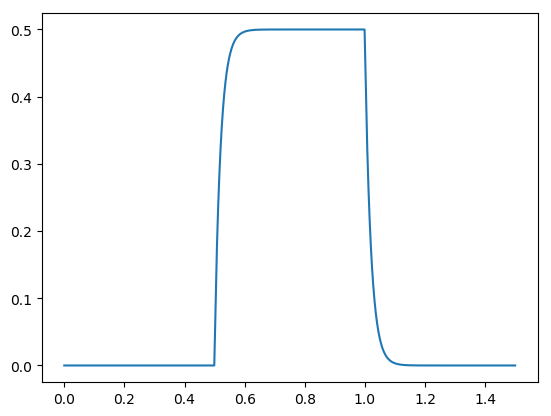

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7337578198>

In [80]:
#parameters
TAU = 0.02
BETA = 1
L0 = 1
F0 = 1
V_MAX = 10
L_ST = 10
K_T = 1
L_MT = 1

V_mt = 1
include("Musclesim.jl")

start = 0
fin = 1.5
dt = 0.001

model = ms.CreateModel(
    t_initial=0, 
    t_final = 1.5,
    dt = 0.001,
    tau = 0.02,
    beta = 1,
    L_initial = 1,
    F_initial = 1,
    V_max = 1,
    F_max = 1,
    L_max = 1,
    K_t = 1,
    L_st = 1,
    L_mt = [1.0],
    V_mt = [1.0],
    excitation_func=ms.excite)

ms.simulate(model)
out = map(t-> ms.interp_activation(model, t), model.time.+0.0005)
plot(model.time, out)

#Kplot(model.time, model.activation)
#plot(time, b[1:length(time)])


In [65]:
a

1×1502 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.00568098  0.00562445  0.00556849

$$
\begin{aligned}
F_m &= F_t                         \\
\dot{F}_m &= \dot{F}_t             \\
F_t &= K_t(L_t - L_{st})           \\
F_m &= A\cdot FV(V_m)\cdot LT(L_m) \\
L_T &= L_{mt} - L_m                \\
\tilde{F}_m &= \frac{F_m}{F_0}     \\
\tilde{L}_m &= \frac{L_m}{L_0}     \\
\tilde{V}_m &= \frac{V_m}{V_{max}} \\
\dot{a}(t) &= \frac{u(t)-a(t)}{\tau} \\
\dot{a}(t) &= \frac{u(t) - (\beta + (1 - \beta) u(t)) a(t)}{\tau} \\
\varepsilon &= \frac{L_t - L_{st}}{L_{st}} \\
LT\left(\frac{L}{L_0}\right) &= -3.0508\cdot \left(\frac{L}{L_0}\right)^2 + 5.9758\cdot \left(\frac{L}{L_0}\right) - 1.9597, 0.42 \le \frac{L}{L_0}\le1.54 \\
K_t &= \frac{F_0}{\varepsilon_{max}L_{st}} \\
\tilde{V}_m &= 0.995242\cdot e^{13.8817(F\tilde{V}-1.39214)} - 0.996815\cdot e^{-3.91442 F\tilde{V}} \\
\dot{F}_t &= K_t (V_{mt} - V_m) \\
V_m &= V_{max} \cdot FV^{-1} \left(\frac{F_m}{F_0 \cdot a \cdot LT(\tilde{L}_m)}\right)
\end{aligned}
$$

$L_{st}$ is the length of the slack tendon.
$a$ is muscle activation
$u$ is neural excitation
$\tau$ is time constant
$\varepsilon$ is tendon strain.

In [70]:
r = collect(5:3:38)
r[length(r)]

38

search: linspace LinSpace



```
linspace(start, stop, n=50)
```

Construct a range of `n` linearly spaced elements from `start` to `stop`.

```jldoctest
julia> linspace(1.3,2.9,9)
1.3:0.2:2.9
```

```
linspace(c1::Color, c2::Color, n=100)
```

Generates `n`>2 colors in a linearly interpolated ramp from `c1` to`c2`, inclusive, returning an `Array` of colors.
